<a href="https://colab.research.google.com/github/hmcklin/CE-430/blob/main/HW_2_McKlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2

There are two files on Blackboard that you will need. The files are real-life data files from an impact echo test and an impulse response test. At this time, you do not need to worry about what the tests are or how they are performed.

Create a Python script that does the following **without the need for manually adjusting the code for each file (with exception of changing the file name)**:

*   Imports one of the data files for analysis.
*   Calculates the number of data points, $N_p$, the duration of the signal, $t_f$, and the sampling interval, $SI$.
*   Plots the time-domain signal with properly labeled x- and y-axes.
*   Calculates the magnitude of the FFT spectrum.
*   Calculates the spectral line spacing, $\Delta_f$.
*   Plots the frequency-domain of the signal while automatically cutting off frequencies above the Nyquist frequency, $f_c$.
*   (BONUS) Automatically determines the peak frequency and prints the result.
*   (BONUS) Automatically determines the peak frequency and plots an arrow on the chart with a callout of the peak frequency value.   

## Grad Students (Anyone enrolled in the 500-level course)
 
*  Plots the frequency-domain with the x-axis being the data point number, not frequency. This is for determining the noise floor.
*  Calculates the signal-noise ratio (SNR) of the signal in the frequency domain using:

$SNR_{dB}=10\log\left( \dfrac{\sigma^2_s}{\sigma^2_n}\right)$

where $\sigma_s$ is the standard deviation of the entire signal and $\sigma_n$ is the standard deviation of the noise.

This table will put the SNR values into some context. For example, if we calculate the SNR to be 20 dB, that means our signal we're trying to measure is 100 times more powerful than the noise!

| dB | Power Ratio |
|:--:|-------------|
| 50 | 100,000     |
| 40 | 10,000      |
| 30 | 1,000       |
| 20 | 100         |
| 10 | 10          |
|  6 | 3.981       |
|  3 | 1.995       |
|  1 | 1.259       |
|  0 | 1           |


Importing necessary tools:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import integrate as spi

from pandas.compat import numpy
big_embedded = pd.read_csv('Big_Embedded.txt',sep='\t',names=('Time','Signal'),header=None)
Time = np.array(big_embedded.Time)
Signal = np.array(big_embedded.Signal)

from scipy.fft import fft,fftfreq

First we will plot the time-domain signal:

Text(0, 0.5, 'Signal')

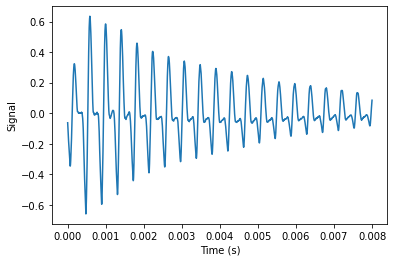

In [3]:
plt.plot(Time,Signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

Next we will calculate relevant values:

In [25]:
N_p = len(Signal)
t_f = len(Time)*0.001
SI = t_f*1/N_p
deltaf = 1/t_f
Magnitude = abs(max(fft(Signal)))

print('N_p, the nunber of data points:')
print(N_p)

print('t_f, the duration of the signal (s):')
print(t_f)

print('SI, the sampling interval:')
print(SI)

print('deltaf, the spectral line spacing:')
print(deltaf)

print('Magnitude of the FFT (a.u.):')
print(Magnitude)

N_p, the nunber of data points:
8000
t_f, the duration of the signal (s):
8.0
SI, the sampling interval:
0.001
deltaf, the spectral line spacing:
0.125
Magnitude of the FFT (a.u.):
504.9018019604716


Now we will execute the fast fourier transform:

The peak frequency (Hz):
4.875


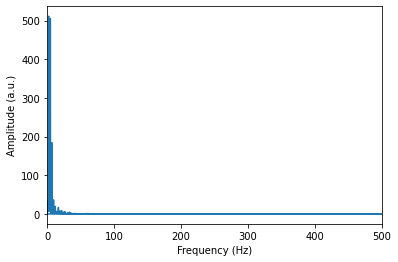

In [26]:
yf = fft(Signal)

xf = fftfreq(N_p, SI)

fc = 1/(2*SI)

plt.plot(xf,np.abs(yf))
plt.xlim(0,fc)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')

max_y = max(abs(yf))  # Find the maximum y value
max_x = xf[yf.argmax()] # Find the corresponding x value
print('The peak frequency (Hz):')
print(max_x)
